## Criando um plot
- https://matplotlib.org/stable/plot_types/basic/plot.html#sphx-glr-plot-types-basic-plot-py

In [3]:
# Importar a biblioteca do pandas e o matplotlib
import pandas as pd
import matplotlib.pyplot as plt

![](https://matplotlib.org/stable/_images/anatomy.png)

In [29]:
# Criar o DataFrame dos dados abaixo
dados = {
    'X': [1,2,3,4,5,6],
    'Y': [120,110,130,145,118,125],
    'Z': [95,54,86,77,90,81]
}

df = pd.DataFrame(dados)

In [5]:
# Mostrar os dados do DataFrame
df

,X,Y,Z
0,1,120,95
1,2,110,54
2,3,130,86
3,4,145,77
4,5,118,90
5,6,125,81


## Plotando dados de X e Y em um histograma

Obs.: Acredito que seria para plotar um gráfico de linha em vez de um histograma. Devido ao formato do dataframe, o histograma seria criado a partir de gráfico bar, o que é solicitado nos próximos exercícios. 

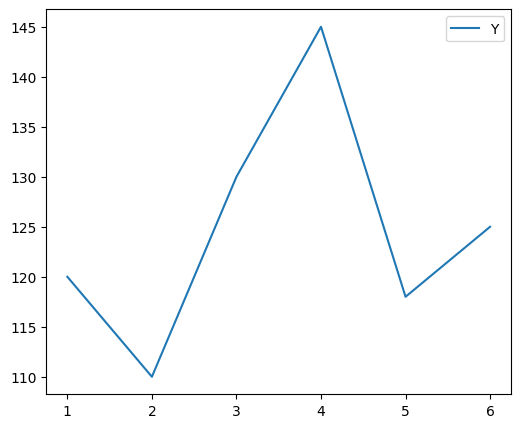

In [9]:
# Criar uma figura e plotar o gráfico incluindo a Legenda Y

fig, ax = plt.subplots(figsize=(6,5))
#df.plot('X', 'Y', ax = ax)
ax.plot(df['X'], df['Y'], label='Y')
ax.legend()
plt.show()

## Separando em 2 gráficos
- Como argumento do plt.subplots podemos passar o número de linhas e colunas que queremos no nosso plot
    - `plt.subplots(nrows= ,ncols= )`
- Nesse caso vamos precisar passar um índice para o ax (`ax[0], ax[1]`)

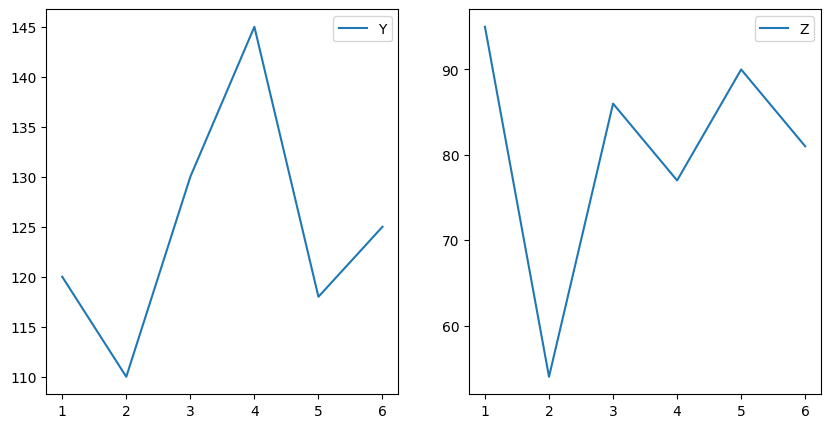

In [10]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
#df.plot('X', 'Y', ax = ax[0])
#df.plot('X', 'Z', ax = ax[1])

ax[0].plot(df['X'], df['Y'], label='Y')
ax[1].plot(df['X'], df['Z'], label='Z')
ax[0].legend()
ax[1].legend()
plt.show()

## Melhorando a visualização
- Para aumentar o tamanho do gráfico podemos usar o `figsize=(x,y)`
- Se quisermos mudar a proporção dos gráficos, podemos usar o `gridspec_kw={'height_ratios': []}`
- [Referencias](https://stackoverflow.com/questions/34268742/how-to-use-gridspec-with-subplots)

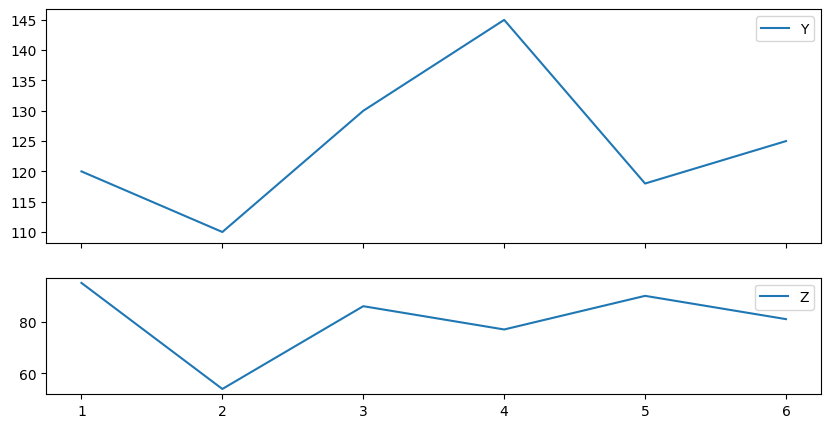

In [11]:
fig, ax = plt.subplots(2,1,figsize=(10,5), sharex=True, gridspec_kw={'height_ratios': [4,2]})
# df.plot('X', 'Y', ax = ax[0])
# df.plot('X', 'Z', ax = ax[1])

ax[0].plot(df['X'], df['Y'], label='Y')
ax[1].plot(df['X'], df['Z'], label='Z')
ax[0].legend()
ax[1].legend()
plt.show()

## Alterando o tipo de gráfico para Barras e visualizando em duas colunas

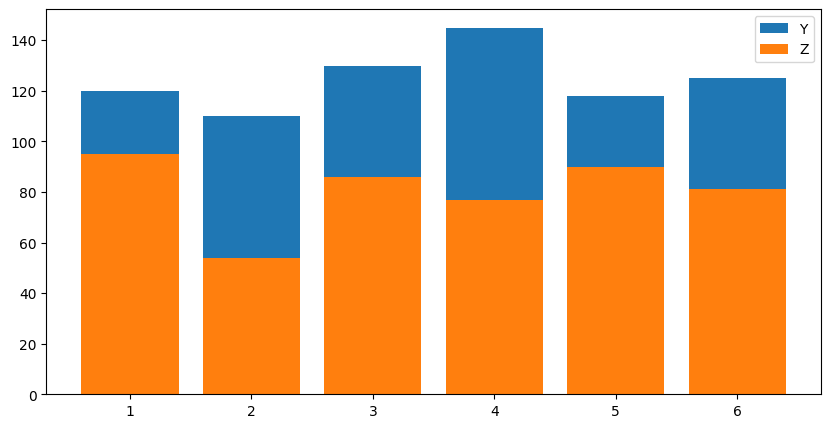

In [43]:
fig, ax = plt.subplots(figsize=(10,5))
#df.plot('X', ['Y', 'Z'], kind = 'bar', ax = ax)

ax.bar(df['X'], df['Y'], label='Y')
ax.bar(df['X'], df['Z'], label='Z')
ax.legend()
plt.show()

## Vamos ajustar as barras para ficarem lado a lado
- Vamos definir a largura das barras
    - https://matplotlib.org/stable/plot_types/basic/bar.html
- Depois vamos deslocar o gráfico para os lados

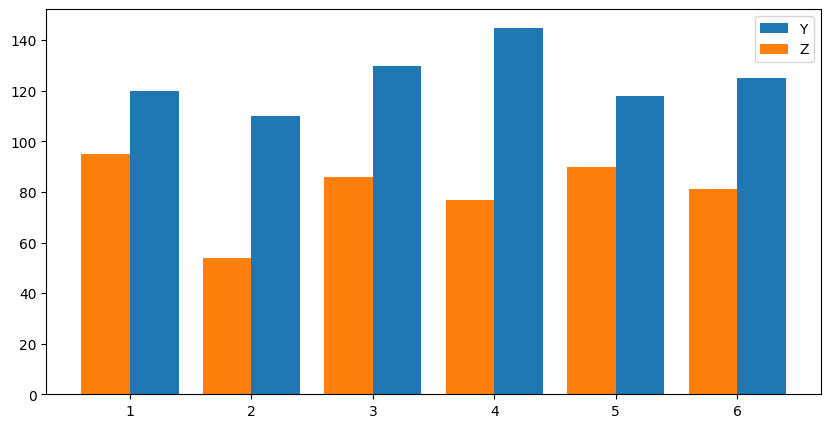

In [44]:
fig, ax = plt.subplots(figsize=(10,5))
#df.plot('X', ['Y', 'Z'], kind = 'bar', ax = ax)

ax.bar(df['X'], df['Y'], width=0.4, align='edge', label='Y')
ax.bar(df['X'], df['Z'], width=-0.4, align='edge', label='Z')
ax.legend()
plt.show()

## Colocando rótulo nos dados
- Para isso, vamos usar o `annotate`
    - https://matplotlib.org/3.5.0/api/_as_gen/matplotlib.pyplot.annotate.html
    - Para usar o annotate, vamos passar `.annotate("<Texto>",<posicao(x,y)>)`
- Podemos posicionar o annotate exatamente em cima da barra usando a posição y
- Usando o `for`, é possível aplicar o annotate para todas as barras
- Por fim, vamos usar os parâmetros do annotate para melhorar a visualização
    - ha         -> alinhamento horizontal
    - xytext     -> deslocamento x,y do texto em relação a um referencial
    - textcoords -> referencial que vamos fazer o deslocamento acima
    - fontsize   -> tamanho da fonte
    - fontweight -> colocando em negrito

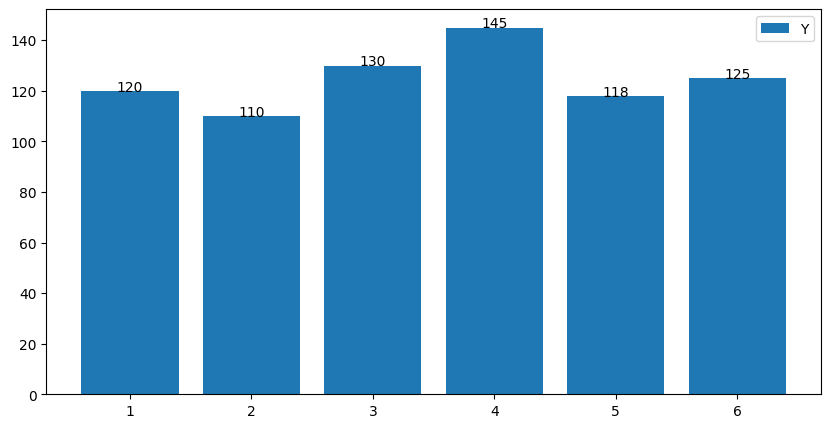

In [45]:
fig, ax = plt.subplots(figsize=(10,5))
#df.plot('X', ['Y', 'Z'], kind = 'bar', ax = ax)

ax.bar(df['X'], df['Y'], label='Y')
ax.legend()
# Colocando somente o primeiro valor no gráfico
for i in range(1,7):
    plt.annotate(df['Y'][i-1],
                 (i,df['Y'][i-1]),    # colocando a posição do elemento 
                 ha="center") # alinhamento horizontal

plt.show()

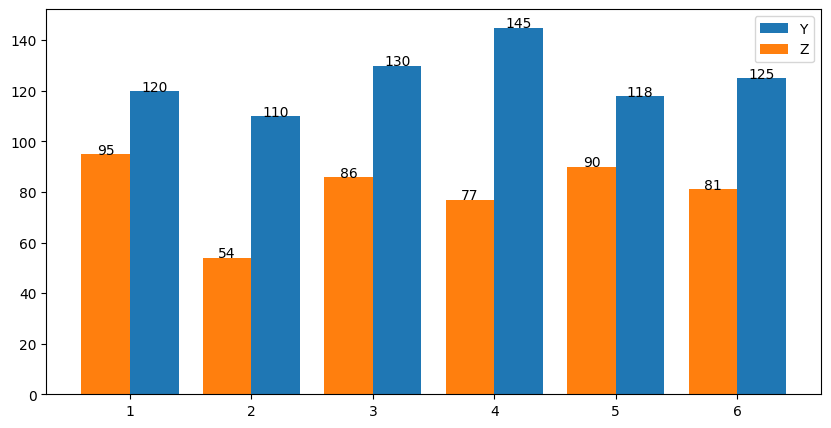

In [54]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(df['X'], df['Y'], width=0.4, align='edge', label='Y')
ax.bar(df['X'], df['Z'],width=-0.4, align='edge', label='Z')
ax.legend()

for i in range(1,7):
    plt.annotate(df['Y'][i-1],
                 (i+0.2,df['Y'][i-1]),    # colocando a posição do elemento 
                 ha="center") # alinhamento horizontal
    plt.annotate(df['Z'][i-1],
                 (i-0.2,df['Z'][i-1]),    # colocando a posição do elemento 
                 ha="center") # alinhamento horizontal

plt.show()

In [61]:
import matplotlib
print(matplotlib.__version__)

3.3.4


## Ajustando o eixo y para melhorar a visualização dos rótulos
- O `.set_yticks` vai permitir que alterar o intervalo do eixo y
- O `.yaxis.set_visible` permite que os valores do eixo y não fiquem visíveis

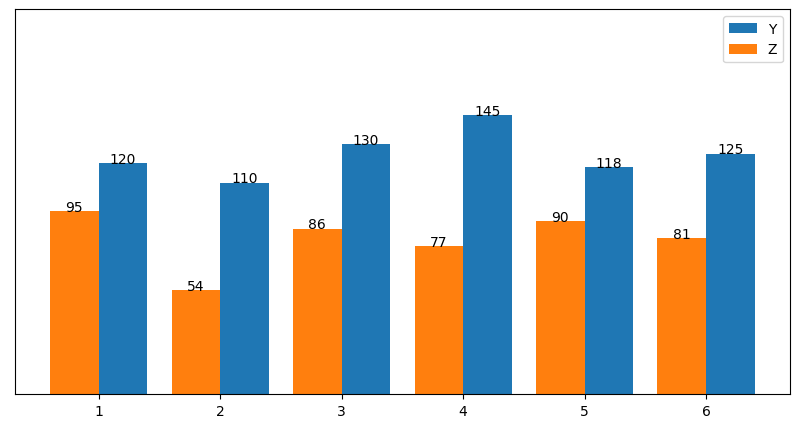

In [67]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(df['X'], df['Y'], width=0.4, align='edge', label='Y')
ax.bar(df['X'], df['Z'],width=-0.4, align='edge', label='Z')
ax.set(ylim =(0, 200)) #alterando o intervalo do eixo y
ax.yaxis.set_visible(False) #tirando os labels ticks do eixo y
ax.legend()

for i in range(1,7):
    plt.annotate(df['Y'][i-1],
                 (i+0.2,df['Y'][i-1]),    # colocando a posição do elemento 
                 ha="center") # alinhamento horizontal
    plt.annotate(df['Z'][i-1],
                 (i-0.2,df['Z'][i-1]),    # colocando a posição do elemento 
                 ha="center") # alinhamento horizontal

plt.show()

## Retirando bordas do gráfico
- Usando o `.spines[].set_visible(False)` é possível retirar as bordas de um gráfico

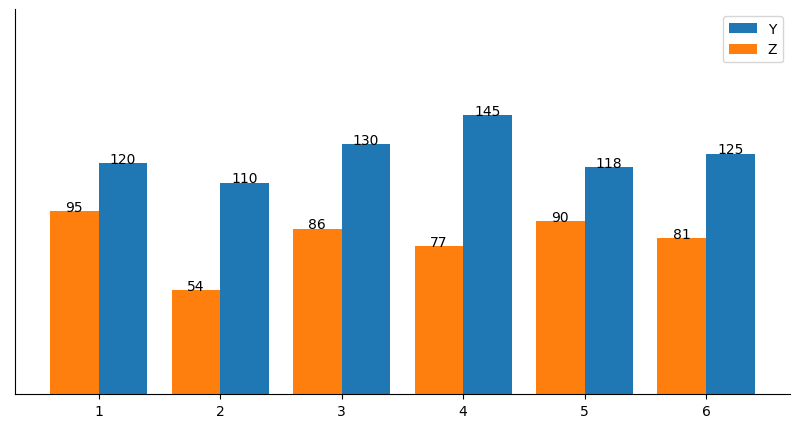

In [90]:
fig, ax = plt.subplots(figsize=(10,5))

ax.bar(df['X'], df['Y'], width=0.4, align='edge', label='Y')
ax.bar(df['X'], df['Z'],width=-0.4, align='edge', label='Z')
ax.set(ylim =(0, 200)) #alterando o intervalo do eixo y
ax.yaxis.set_visible(False) #tirando os labels ticks do eixo y

ax.legend()

for i in range(1,7):
    plt.annotate(df['Y'][i-1],
                 (i+0.2,df['Y'][i-1]),    # colocando a posição do elemento 
                 ha="center") # alinhamento horizontal
    plt.annotate(df['Z'][i-1],
                 (i-0.2,df['Z'][i-1]),    # colocando a posição do elemento 
                 ha="center") # alinhamento horizontal

# Remover bordas
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)
#plt.box(on=False) # remover todas as bordas
#ax.set_axis_off() # remover todas as bordas

plt.show()

## Separando realizado de projetado 
- Podemos cada gráfico em 2 gráficos diferentes para fazer o realizado e o projetado, mudando as cores das barras
- Cores: azul (#C6F0F5) e laranja (#FFC174)

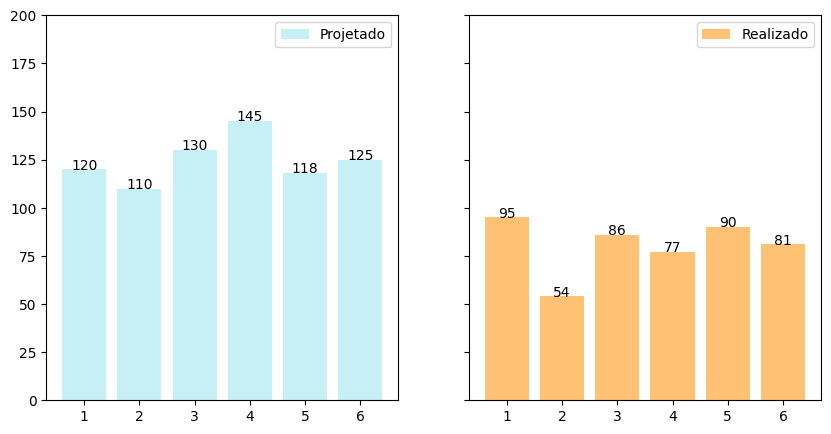

In [105]:
fig, ax = plt.subplots(1,2,sharey=True,figsize=(10,5))


ax[0].bar(df['X'], df['Y'], label='Projetado', color='#C6F0F5')    
ax[1].bar(df['X'], df['Z'], label='Realizado', color='#FFC174')

for i in range(1,7):
    ax[0].annotate(df['Y'][i-1],
                 (i,df['Y'][i-1]),    # colocando a posição do elemento 
                 ha="center") # alinhamento horizontal
    ax[1].annotate(df['Z'][i-1],
                 (i,df['Z'][i-1]),    # colocando a posição do elemento 
                 ha="center") # alinhamento horizontal

ax[0].set(ylim =(0, 200)) #alterando o intervalo do eixo y
ax[0].legend()
ax[1].legend()
plt.show()